In [ ]:
#Зчитайте дані з таблиці "Середньорічна щомісячна зарплата в Україні за 1992—2022 роки" з Вікіпедії за посиланням



In [ ]:
#Варіант 7

In [379]:
import pandas as pd

In [380]:
import numpy as np

In [381]:
# Зчитуємо дані з вказаного URL
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

In [382]:
# Зчитуємо таблицю в DataFrame
data = pd.read_html(url, header=0)[2]

In [372]:
# Виводимо перші 5 рядків таблиці
df_1 = data.head(5)
print(df_1)

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


In [373]:
#Визначте кількість рядків і стовпчиків за допомогою атрибуту shape
ryad, stovp = df_1.shape
print("Рядків:", ryad)
print("Стовпчиків:", stovp)

Рядків: 5
Стовпчиків: 5


In [374]:
#Визначте загальну кількість років та кількість місяців у даних
rik = ryad
mic = (stovp - 1) * rik
print("Всього років", rik)
print("Всього місяців", mic)

Всього років 5
Всього місяців 20


In [375]:
#Замінити пропущені значення  «-» в таблиці на NaN
df_1 = df_1.replace('-', np.nan)

In [376]:
#Визначити тип стовпців за допомогою dtypes.
print(df_1.dtypes)

Рік                                           object
В національній валюті                         object
В доларах США                                 object
Кількість кг хліба[20] на середню зарплату    object
Кількість БігМаків на середню зарплату        object
dtype: object


In [ ]:
#Замінити тип нечислових даних на числові.
df_1['В доларах США'] = df_1['В доларах США'].replace(',', '.', regex=False)
df_1['В національній валюті'] = df_1['В національній валюті'].replace(',', '.', regex=False)
df_1['В доларах США'] = df_1['В доларах США'].replace('▲', '', regex=False)
df_1['В національній валюті'] = df_1['В національній валюті'].replace('▲', '', regex=False)
df_1['В доларах США'] = df_1['В доларах США'].replace('▼', '', regex=False)
df_1['В національній валюті'] = df_1['В національній валюті'].replace('▼', '', regex=False)
df_1['Рік'] = pd.to_numeric(df_1['Рік'])
df_1['В доларах США'] = pd.to_numeric(df_1['В доларах США'])
df_1['В національній валюті'] = pd.to_numeric(df_1['В національній валюті'])

#Мені треба було видалити символи та коми для перетворення, тому що воно вибивало помилку

In [358]:
#Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len)
propus = (df_1.isnull().sum() / len(df_1))
print(propus)

Рік                                           0.0
В національній валюті                         0.0
В доларах США                                 0.0
Кількість кг хліба[20] на середню зарплату    0.0
Кількість БігМаків на середню зарплату        0.0
dtype: float64


In [359]:
#Замініть всі пропущені значення на середні значення по (стовпцю).
df_1= df_1.mean()

<ipython-input-359-18c0d61d8b02>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1= df_1.mean()


In [346]:
#Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.
max_uah = df_1['В національній валюті'].max()
rik_max = df_1[df_1['В національній валюті'] == max_uah]['Рік']
print(f"Рік з найвищою зарплатою в грн: {rik_max.values[0]}")
print(f"Зарплата в грн: {max_uah}")

Рік з найвищою зарплатою в грн: 1995
Зарплата в грн: 7304000▲


In [174]:
#Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату.
min_usd = df_1['В доларах США'].min()
rik_min = df_1[df_1['В доларах США'] == min_usd]['Рік']
print(f"Рік з мінімальною зарплатою в доларах США: {rik_min.values[0]}")
print(f"Зарплата в доларах США: {min_usd}")

Рік з мінімальною зарплатою в доларах США: 1992
Зарплата в доларах США: 28,04▼


In [ ]:
#Виведіть роки, коли зарплата в грн була вище середньої.
sered = df_1[df_1['В національній валюті'] > df_1['В національній валюті'].mean()]['Рік']
print("Роки, коли середня зарплата в гривнях була вище середньої:")
print(sered)
#невпевнений в правильності

In [347]:
#Порівняйте  зарплату  в грн за останні два доступних роки.
years = df_1[['Рік', 'В національній валюті']].tail(2)
print(years)

    Рік В національній валюті
3  1995              7304000▲
4  1996               125,23▼


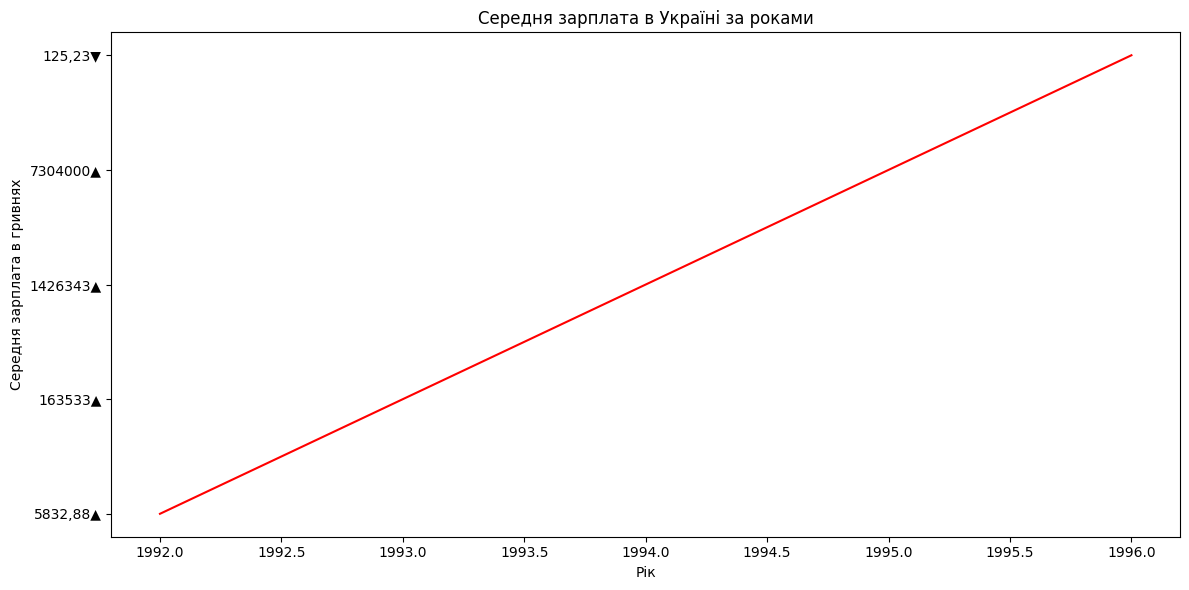

In [378]:
#Створіть графік, що відображає  зарплату в Україні з часом (за роками).
import matplotlib.pyplot as plt

years = df_1['Рік']
a_uah = df_1['В національній валюті']
plt.figure(figsize=(12, 6))
plt.plot(years, a_uah, linestyle='-', color='r')
plt.title('Середня зарплата в Україні за роками')
plt.xlabel('Рік')
plt.ylabel('Середня зарплата в гривнях')
plt.tight_layout()
plt.show()

In [242]:
#Видаліть останній рік з таблиці та виведіть оновлену таблицю
df_1 = df_1.iloc[:-1]
print(df_1)

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  


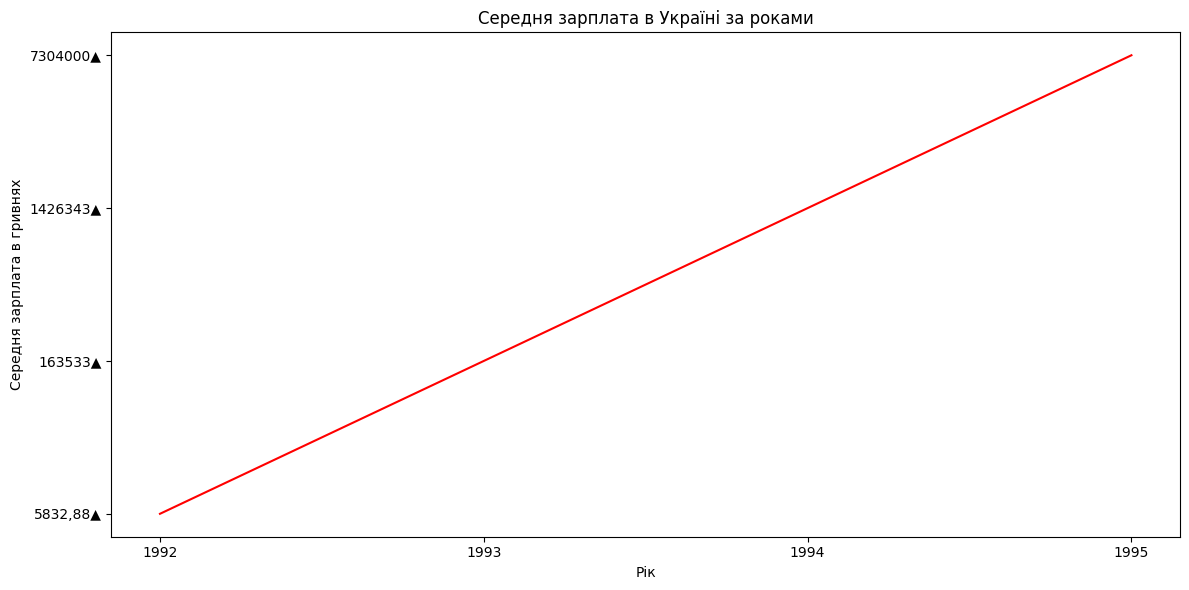

In [243]:
#Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року.
import matplotlib.pyplot as plt
years = df_1['Рік']
a_uah = df_1['В національній валюті']
plt.figure(figsize=(12, 6))
plt.plot(years, a_uah, linestyle='-', color='r')
plt.title('Середня зарплата в Україні за роками')
plt.xlabel('Рік')
plt.ylabel('Середня зарплата в гривнях')
plt.tight_layout()
plt.show()

In [247]:
from ctypes import resize
dvayears = df_1['В національній валюті'][-2:].sum()
pyatyears = df_1['В національній валюті'][-5:].sum()
rizn = dvayears - pyatyears
if rizn > 0:
    v = "Зарплата за останні два роки вища ніж за останні 5 років на " + str(rizn) + " гривень"
elif rizn < 0:
    v = "Зарплата за останні два роки нижча ніж за останні 5 років на " + str(abs(rizn)) + " гривень"
else:
    v = "Зарплата за останні два роки така ж, як за останні 5 років"
print("Зарплата за останні два роки:", dvayears)
print("Зарплата за останні 5 років:", pyatyears)
print(v)

Зарплата за останні два роки: 0.0
Зарплата за останні 5 років: 0.0
Зарплата за останні два роки така ж, як за останні 5 років


In [ ]:
#Висновок: ми вчилися працювати с табличними даними за допомогою бібліотек "Pandas" та "Numpy". Навчилися виводити та перетворювати дані, робити графіки.

In [ ]:
#В більшості завдань я не дуже впевненний (дуже сильно заплутався)